In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## 1. Sigmoid
* 정의
    * $\sigma(x) = \frac{1}{1+e^{-x}}$
* 미분
    * $\frac{\partial}{\partial{x}}\sigma(x) = \sigma(x) \cdot (1-\sigma(x))$
* 특징
  1. 입력값을 0과 1사이로 매핑
  2. 출력을 확률처럼 해석 가능
  3. 미분 가능 $\rightarrow$ backpropagation 사용 가능
  4. 단점: 입력값이 너무 크거나 너무 작으면 gradient가 0에 가까워지는 vanishing gradient 문제 발생
* 그래프 특징:
  * x=0일 때, $\sigma(0)=0.5$
  * x $\rightarrow +\infty \rightarrow \sigma(x) \rightarrow 1$
  * x $\rightarrow -\infty \rightarrow \sigma(x) \rightarrow 0$
  * S자형 curve

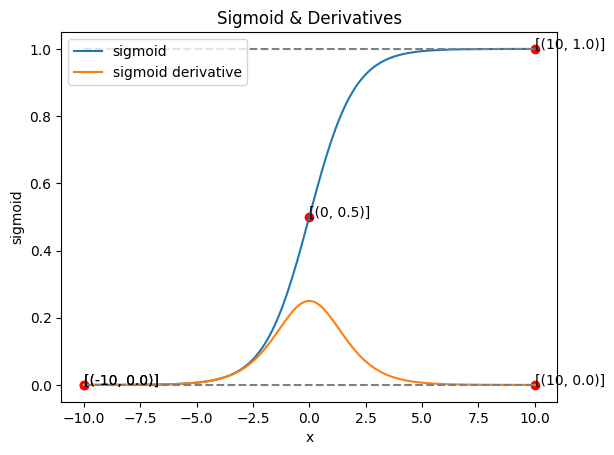

In [26]:
from src.activations import sigmoid

xmin = -10
xmax = 10

x = np.linspace(xmin, xmax, num=200)
y = sigmoid.func(x)
y_grad = sigmoid.derivative(x)

points = [
    [0, np.round(sigmoid.func(0), 2)],
    [xmin, np.round(sigmoid.func(xmin), 2)],
    [xmax, np.round(sigmoid.func(xmax), 2)],
    [xmin, np.round(sigmoid.derivative(xmin), 2)],
    [xmax, np.round(sigmoid.derivative(xmax), 2)],
]

plt.plot(x, y, label=sigmoid.name)
plt.plot(x, y_grad, label=f"{sigmoid.name} derivative")
plt.hlines(y=sigmoid.ymin, xmin=xmin, xmax=xmax, colors="gray", linestyles="--")
plt.hlines(y=sigmoid.ymax, xmin=xmin, xmax=xmax, colors="gray", linestyles="--")

for point in points:
    x, y = point[0], point[1]
    plt.scatter(x=x, y=y, color="red")
    plt.text(x=x, y=y, s=f"[{x, y.item()}]")

plt.title(f"{sigmoid.name.capitalize()} & Derivatives")
plt.xlabel("x")
plt.ylabel(sigmoid.name)
plt.legend()
plt.savefig(f"{sigmoid.name.capitalize()} & Derivatives")
plt.show()
plt.close()

## 2. tanh
* 정의
    * $\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$
* 미분
    * $\frac{\partial}{\partial{x}}tanh(x) = 1 - tanh^2(x)$
* 특징
  1. 입력값을 -1과 1사이로 매핑
  2. 출력을 정규화된 값처럼 해석 가능
  3. 미분 가능 $\rightarrow$ backpropagation 사용 가능
  4. sigmoid와 달리 0이 중심이 되기 때문에 **학습 속도**가 조금 더 빠르다
     - 학습이란? 모델이 데이터로부터 정답을 맞추는 능력을 키우는 과정
     - ml에서 학습은 Backpropagation을 사용(gradient = 출력 * 다음 layer의 gradient)
     - sigmoid: 출력이 항샹 양수 $\rightarrow$ gradient 편향 $\rightarrow$ 학습이 느릴 수 있음
     - tanh: 출력 0 중심 $\rightarrow$ gradient 양/음 $\rightarrow$ 학습이 상대적으로 빠름
  6. 단점: 입력값이 너무 크거나 너무 작으면 gradient가 0에 가까워지는 vanishing gradient 문제 발생
* 그래프 특징:
  * x=0일 때, $\sigma(0)=0$
  * x $\rightarrow +\infty \rightarrow \sigma(x) \rightarrow 1$
  * x $\rightarrow -\infty \rightarrow \sigma(x) \rightarrow -1$
  * S자형 curve

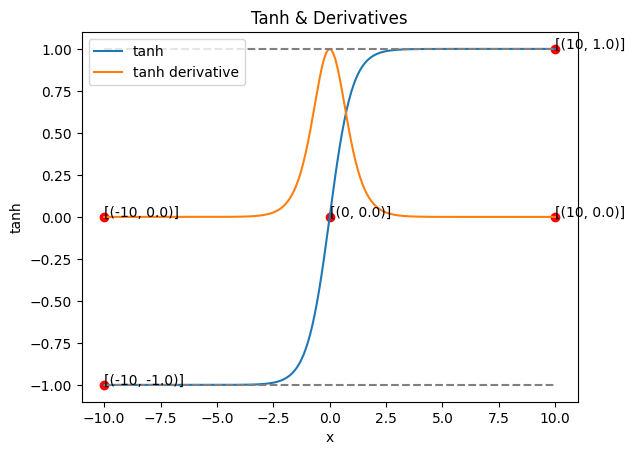

In [27]:
from src.activations import tanh

xmin = -10
xmax = 10

x = np.linspace(xmin, xmax, num=200)
y = tanh.func(x)
y_grad = tanh.derivative(x)

points = [
    [0, np.round(tanh.func(0), 2)],
    [xmin, np.round(tanh.func(xmin), 2)],
    [xmax, np.round(tanh.func(xmax), 2)],
    [xmin, np.round(tanh.derivative(xmin), 2)],
    [xmax, np.round(tanh.derivative(xmax), 2)],
]

plt.plot(x, y, label=tanh.name)
plt.plot(x, y_grad, label=f"{tanh.name} derivative")
plt.hlines(y=tanh.ymin, xmin=xmin, xmax=xmax, colors="gray", linestyles="--")
plt.hlines(y=tanh.ymax, xmin=xmin, xmax=xmax, colors="gray", linestyles="--")

for point in points:
    x, y = point[0], point[1]
    plt.scatter(x=x, y=y, color="red")
    plt.text(x=x, y=y, s=f"[{x, y.item()}]")

plt.title(f"{tanh.name.capitalize()} & Derivatives")
plt.xlabel("x")
plt.ylabel(tanh.name)
plt.legend()
plt.savefig(f"{tanh.name.capitalize()} & Derivatives")
plt.show()
plt.close()

## 3. ReLU

* 정의
  * $ReLU(x) = max(0, x)$
* 미분
  * $\frac{\partial}{\partial{x}}ReLU(x) = \begin{cases}1 & (x>0) \\ 0 & (x \le0) \end{cases}$
  * 0에서 미분이 정의되지 않지만 일반적으로 위와 같이 정의합니다.
* 특징
  1. 입력값을 0이상으로 변환
  2. 비선형 함수이지만 계산이 매우 간단
  3. 미분 가능 $\rightarrow$ backpropagation 사용 가능
      - x=0에서만 미분 불가능하지만, 실제 학습에서는 문제
  4. Vanishing Gradient 문제를 완화
      - sigmoid/tanh는 입력이 크면 gradient가 0에 근사하게 작아짐
      - ReLU 는 X>0인 구간에서 gradient=1 $\rightarrow$ gradient 소실 문제 완화
  5. Sparse Activation(희소 활성화)
      - 음수 입력은 0이 되므로 일부 neuron만 활성화 됨
      - 이는 연산 효율성과 일반화(regularization) 측면에서 도움이 됨
  6. 단점: Dead ReLU problem
      - 학습 중 일부 neuron의 입력이 계속 0보다 작으면
        - gradient가 0 $\rightarrow$ 가중치가 업데이트되지 않음
        - neuron이 "죽은" 상태가 됨(출력이 항상 0)
          
* Sparse Activation이란?
  * 많은 뉴런에서 0을 출력하고 일부만 활성화되는 상태
  * 한 번의 입력에서 전체 뉴런 중 일부만 켜지는(활성화) 현상
    *  [0, 0, 3.2, 0, 0, 5.1, 0]
    *  3.2와 5.1만 활성화 되었다고 할 수 있음
    *  이런 상태를 sparse 하다고 함
  * 활성 함수 ReLU가 input의 음수를 비활성화 하기 때문에 발생
  * 장점?
    * 계산 효율성: 0을 출력하는 뉴런은 이후 계산에 거의 참여하지 않음
    * 일반화 효과(regularization): 일부 뉴런만 작동하므로 너무 많은 feature에 의존하지 않음
  * 단점?
    * 정보 손실
    * dead relu

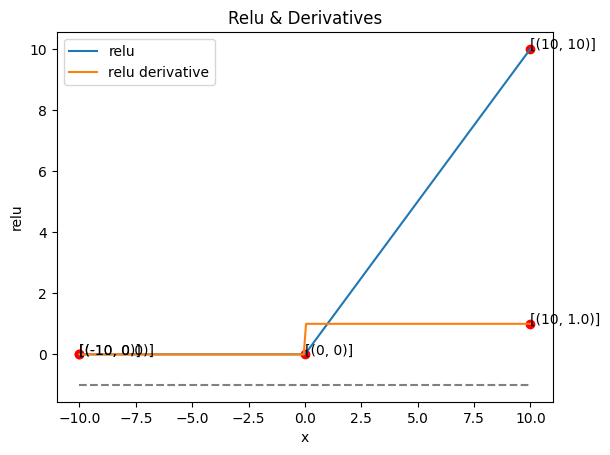

In [28]:
from src.activations import relu

xmin = -10
xmax = 10

x = np.linspace(xmin, xmax, num=200)
y = relu.func(x)
y_grad = relu.derivative(x)

points = [
    [0, np.round(relu.func(0), 2)],
    [xmin, np.round(relu.func(xmin), 2)],
    [xmax, np.round(relu.func(xmax), 2)],
    [xmin, np.round(relu.derivative(xmin), 2)],
    [xmax, np.round(relu.derivative(xmax), 2)],
]

plt.plot(x, y, label=relu.name)
plt.plot(x, y_grad, label=f"{relu.name} derivative")
plt.hlines(y=tanh.ymin, xmin=xmin, xmax=xmax, colors="gray", linestyles="--")

for point in points:
    x, y = point[0], point[1]
    plt.scatter(x=x, y=y, color="red")
    plt.text(x=x, y=y, s=f"[{x, y.item()}]")

plt.title(f"{relu.name.capitalize()} & Derivatives")
plt.xlabel("x")
plt.ylabel(relu.name)
plt.legend()
plt.savefig(f"{relu.name.capitalize()} & Derivatives")
plt.show()
plt.close()

## Vanishing Gradient

- X값의 구간에 따른 Gradient 값
| 구간         | Sigmoid' | tanh' | ReLU' |
| ---------- | -------- | ----- | ----- |
| **x < -3** | 거의 0     | 거의 0  | 0     |
| **x ≈ 0**  | 약 0.25   | 1     | 0~1   |
| **x > 3**  | 거의 0     | 거의 0  | 1     |

- 정리
  - **sigmoid & tanh**은 입력이 0근처에서 0.25와 1이 최대<br>
    $\rightarrow$ 입력 값이 커지거나 작아지면 gradient가 0에 근접 $\rightarrow$ **소실**
  - **ReLU**는 x>0 구간에서는 gradient=1<br>
    $\rightarrow$ gradient가 계속 살아남음 $\rightarrow$ **학습이 잘 전달됨**

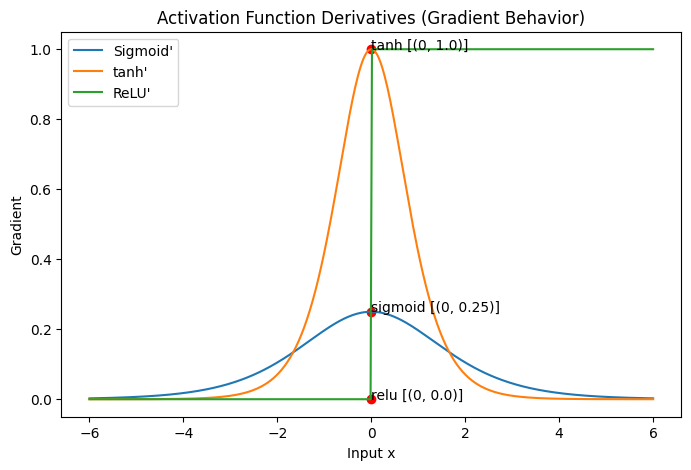

In [29]:
x = np.linspace(-6, 6, 400)

# 미분값 계산
plt.figure(figsize=(8,5))
plt.plot(x, sigmoid.derivative(x), label="Sigmoid'")
plt.plot(x, tanh.derivative(x), label="tanh'")
plt.plot(x, relu.derivative(x), label="ReLU'")

points = [
    [0, np.round(sigmoid.derivative(0), 2), sigmoid.name],
    [0, np.round(tanh.derivative(0), 2), tanh.name],
    [0, np.round(relu.derivative(0), 2), relu.name],
]

for point in points:
    x, y, name = point[0], point[1], point[2]
    plt.scatter(x=x, y=y, color="red")
    plt.text(x=x, y=y, s=f"{name} [{x, y.item()}]")

plt.title("Activation Function Derivatives (Gradient Behavior)")
plt.xlabel("Input x")
plt.ylabel("Gradient")
plt.legend()
plt.savefig("Activation Function Derivatives (Gradient Behavior)")
plt.show()
plt.close()

### Dead ReLU
> ReLU의 출력이 0인 상태가 계속 유지되어, <br>
해당 neuron gradient가 $\rightarrow$ 가중치가 업데이트되지 않는 문제<br>
즉, 입력이 계속 음수면 neuron이 **"죽어서" 항상 0만 출력**

1. inputs는 평균을 -1로 설정하여 음수 입력이 많음
2. ReLU를 거치면서 음수 입력 $\rightarrow$ 0 출력
3. 일부 neuron은 모든 샘플에서 0 $\rightarrow$ Dead ReLU 발생
4. 출력 그래프에서 평평하게 0인 neuron이 바로 dead neuron

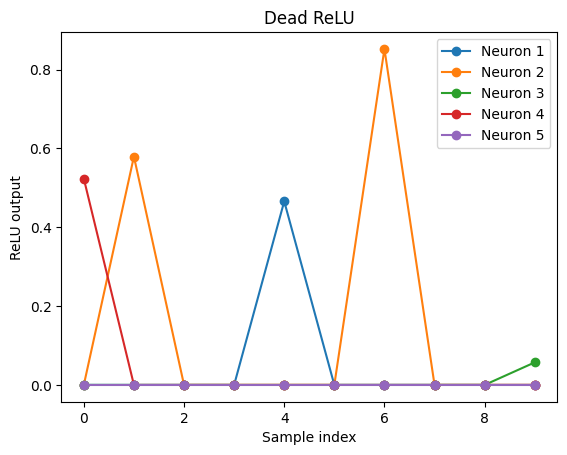

Dead neurons: [False False False False  True]


In [36]:
np.random.seed(42)
# 랜덤 입력 데이터 5 neurons, 10 samples
# 평균 -1 -> 음수 값 많게 설정
inputs = np.random.randn(10, 5) - 1
outputs = relu.func(inputs)

for i in range(5):
    plt.plot(outputs[:, i], marker="o", label=f"Neuron {i+1}")
plt.title("Dead ReLU")
plt.xlabel("Sample index")
plt.ylabel("ReLU output")
plt.legend()
plt.savefig("Dead ReLU")
plt.show()
plt.close()

dead_neurons = np.all(outputs == 0, axis=0) # sample단위
print("Dead neurons:", dead_neurons)

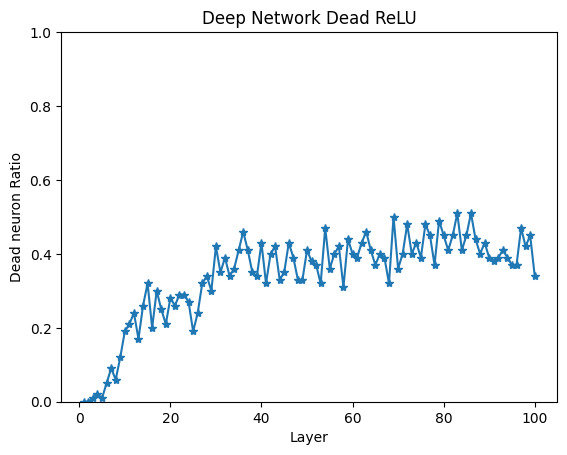

In [31]:
dead_ratios = []
n_neurons = 100
n_layers = 100
n_samples = 1000

inputs = np.random.randn(n_samples, n_neurons) - 0.5


x = inputs
for layer in range(n_layers):
    W = np.random.randn(n_neurons, n_neurons)
    b = np.random.randn(n_neurons) * 0.1
    
    x = x @ W + b
    x = relu.func(x)
    
    dead_ratio = np.mean(np.all(x==0, axis=0)) # 모든 샘플이 0인 neuron의 비율
    dead_ratios.append(dead_ratio)
    
plt.plot(range(1, n_layers+1), dead_ratios, marker="*")
plt.title("Deep Network Dead ReLU")
plt.xlabel("Layer")
plt.ylabel("Dead neuron Ratio")
plt.ylim(0, 1)
plt.savefig("Deep Network Dead ReLU")
plt.show()
plt.close()


## 4. Leaky ReLU

* 정의
  * $LeakyReLU(x) = \begin{cases} x & (x>0) \\ \alpha x & (x \le 0) \end{cases}$
* 미분
  * $\frac{\partial}{\partial{x}}LeakyReLU(x) = \begin{cases}1 & (x>0) \\ \alpha & (x \le0) \end{cases}$
  * 0에서 미분이 정의되지 않지만 일반적으로 위와 같이 정의합니다.
* 특징 
  * ReLU의 변형 버전
    * 음수 구간에서 alpha라는 상수를 부여
      
  * Dead ReLU 문제 완화
    * ReLU는 $x\le0$이면 완전히 0이 되어 gradient가 사라지는 단점이 있다(dead relu)
    * Leaky ReLU는 아주 작은 상수$\alpha$를 통해 완전히 사라지는 것을 막는다
      
  * Vanishing Gradient 문제 완화
    * 음수 부분에서도 작은 gradient가 존재
      
  * 단점
    * 음수 입력에서 출력이 조금 남아 있어서 **완전한 희소성(sparse activation)** 이 사라짐
    * $\alpha$ 값을 잘못 설정하면 학습 불안정
      * $\alpha$가 너무 크면 음수 방향으로 과도한 출력

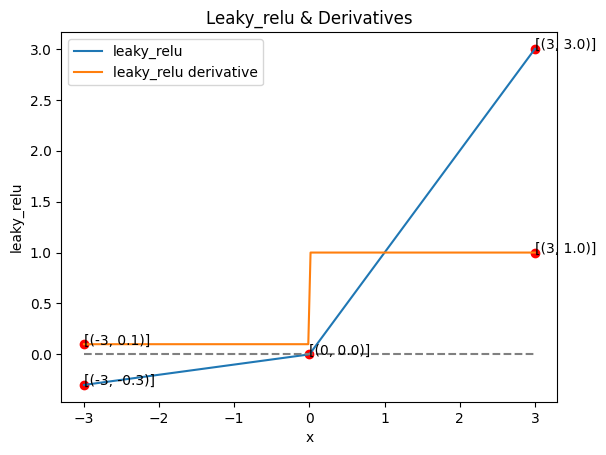

In [32]:
from src.activations import leaky_relu

xmin = -3
xmax = 3
alpha = 0.1

x = np.linspace(xmin, xmax, num=200)
y = leaky_relu.func(x, alpha)
y_grad = leaky_relu.derivative(x, alpha)


points = [
    [0, np.round(leaky_relu.func(0, alpha), 2)],
    [xmin, np.round(leaky_relu.func(xmin, alpha), 2)],
    [xmax, np.round(leaky_relu.func(xmax, alpha), 2)],
    [xmin, np.round(leaky_relu.derivative(xmin, alpha), 5)],
    [xmax, np.round(leaky_relu.derivative(xmax, alpha), 2)],
]

plt.plot(x, y, label=leaky_relu.name)
plt.plot(x, y_grad, label=f"{leaky_relu.name} derivative")
plt.hlines(y=0, xmin=xmin, xmax=xmax, colors="gray", linestyles="--")

for point in points:
    x, y = point[0], point[1]
    plt.scatter(x=x, y=y, color="red")
    plt.text(x=x, y=y, s=f"[{x, y.item()}]")

plt.title(f"{leaky_relu.name.capitalize()} & Derivatives")
plt.xlabel("x")
plt.ylabel(leaky_relu.name)
plt.legend()
plt.savefig(f"{leaky_relu.name.capitalize()} & Derivatives")
plt.show()
plt.close()

## 5. ELU(Exponential Linear Unit)

* 정의
  * $ELU(x) = \begin{cases} x & (x>0) \\ \alpha (e^x-1) & (x \le 0) \end{cases}$
  * $\alpha$는 음수 영역의 완만함을 조절하는 상수(보통 1)
* 미분
  * $\frac{\partial}{\partial{x}}ELU(x) = \begin{cases}1 & (x>0) \\ \alpha e^x & (x \le0) \end{cases}$
  * 0에서 미분이 정의되지 않지만 일반적으로 위와 같이 정의합니다.
* 특징 
  * ReLU의 변형 버전
    * 음수 입력을 완전히 죽이지 않고 부드럽게 이어줌
    * 음수 구간에서 출력이 0보다 작지만 0은 아님
  * 장점
    * dead relu 문제 완화
    * vanishing gradient 완화
  * 단점
    * 계산 비용 증가
      *  $e^x$계산 필요 $\rightarrow$ ReLU보다 연산량 많음
      *  Sparse Activation 감소
      *  $\alpha$ 설정 필요
     


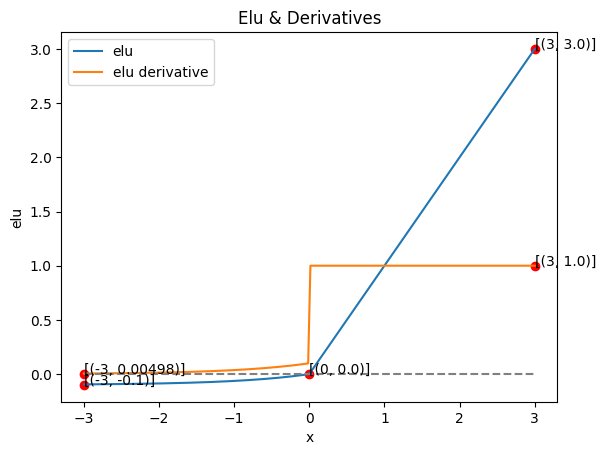

In [33]:
from src.activations import elu

xmin = -3
xmax = 3
alpha = 0.1

x = np.linspace(xmin, xmax, num=200)
y = elu.func(x, alpha)
y_grad = elu.derivative(x, alpha)

points = [
    [0, np.round(elu.func(0, alpha), 2)],
    [xmin, np.round(elu.func(xmin, alpha), 2)],
    [xmax, np.round(elu.func(xmax, alpha), 2)],
    [xmin, np.round(elu.derivative(xmin, alpha), 5)],
    [xmax, np.round(elu.derivative(xmax, alpha), 2)],
]

plt.plot(x, y, label=elu.name)
plt.plot(x, y_grad, label=f"{elu.name} derivative")
plt.hlines(y=0, xmin=xmin, xmax=xmax, colors="gray", linestyles="--")

for point in points:
    x, y = point[0], point[1]
    plt.scatter(x=x, y=y, color="red")
    plt.text(x=x, y=y, s=f"[{x, y.item()}]")

plt.title(f"{elu.name.capitalize()} & Derivatives")
plt.xlabel("x")
plt.ylabel(elu.name)
plt.legend()
plt.savefig(f"{elu.name.capitalize()} & Derivatives")
plt.show()
plt.close()

## 6. GELU(Gaussian Error Linear Unit)

* 정의
  * $GELU(x) = x\cdot\Phi(x)$
  * 여기서 $\Phi$는 표준 정규분포의 누적분포함수(CDF)
    * $\Phi(x)=\frac{1}{2}[1+\text{erf}(\frac{x}{\sqrt{2}})]$
  * 근사식(실제 구현에서 자주 사용)
    * $GELU \approx 0.5x\left( 1+tanh\left( \sqrt{\frac{2}{\pi}}(x+0.044715x^3) \right) \right)$
* 미분
  * 근사식 기준 미분은 복잡하지만, 수치적으로 계산 가능
  * 연속적이고 전 구간에서 미분 가능
  $$
\frac{\partial}{\partial{x}} GELU(x) \approx 0.5 \left[ 1 + \tanh(t) \right] + 0.5 x \cdot \text{sech}^2(t) \cdot \sqrt{\frac{2}{\pi}} \left( 1 + 3 \cdot 0.044715 x^2 \right)
$$

$$
where \quad t = \sqrt{\frac{2}{\pi}} \left( x + 0.044715 x^3 \right), \quad \text{sech}^2(t) = 1 - \tanh^2(t)
$$

* 특징 
  * ReLU의 부드러운 확률적 버전
    * 입력값 x가 클수록 활성화 될 확률이 높음
    * 입력값 x가 작을수록 비활성화될 확률이 낮음
    * 즉, 입력을 확률적으로 통과시키는 **"soft gating"**
  * 완저히 0이 되지 않아 dead neuron이 없음
  * 전 구간에서 연속적으로 부드러운 미분 $\rightarrow$ 학습 안정적
  * BERT, GPT 등 Transformer 기반 모델의 기본 활성화 함수로 사용됨
* 장점
  * ReLU보다 매끄럽고 gradient 흐름이 자연스러움
  * dead relu 문제 완전 제거
  * vanishing gradient 완화
  * 학습이 더 안정적이며 성능 향샹(특히 대규모 모델)
* 단점
  * 계산 복잡도 증가(erf, tanh 연산 포함)
  * 완전히 sparse 하지 않음 $\rightarrow$ 모든 뉴런이 어느 정도 활성화됨

### Soft gating 이란
  * 입력을 0~1 확률로 곱해서 통과시키는 부드러운 문(gate)
  * Gate: 문을 열고 닫는 장치<br>
    $\rightarrow$ 활성화 함수에서 "출력을 얼마나 통과시킬지 결정하는 역할"
  * Soft: 부드럽게 열거나 닫음
    $\rightarrow$ 0과 1처럼 완전히 꺼지거나 켜지지 않고, **중간의 어떤 값이 가능**
  * $GELU(x) = x\cdot\Phi(x)$ 에서
    * $\Phi(x)$ = 0~1사이의 값(CDF, 누적 확률)
    * x가 크면 $\Phi(x) \rightarrow 1 \rightarrow$ 거의 그대로 통과 ($\approx x$)
    * x가 작으면 $\Phi(x) \rightarrow 0 \rightarrow$ 거의 막힘 ($\approx 0$ **하지만 0은 아님**)
    * x가 0 근처 $\Phi(x) \rightarrow 0.5 \rightarrow$ 절반 정도만 통과

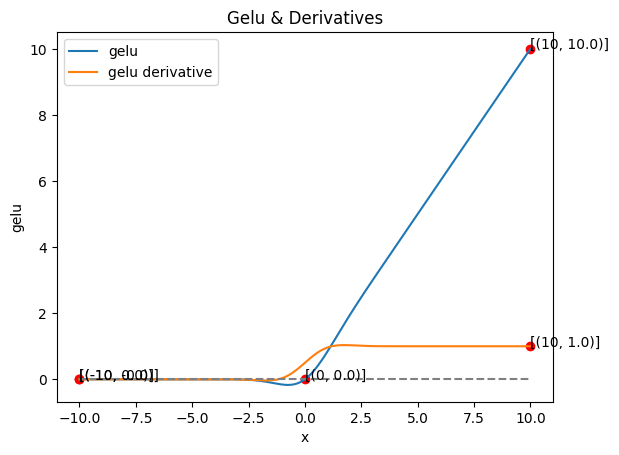

In [34]:
from src.activations import gelu

xmin = -10
xmax = 10

x = np.linspace(xmin, xmax, num=200)
y = gelu.func(x)
y_grad = gelu.derivative(x)

points = [
    [0, np.round(elu.func(0), 2)],
    [xmin, np.round(gelu.func(xmin), 2)],
    [xmax, np.round(gelu.func(xmax), 2)],
    [xmin, np.round(gelu.derivative(xmin), 5)],
    [xmax, np.round(gelu.derivative(xmax), 2)],
]

plt.plot(x, y, label=gelu.name)
plt.plot(x, y_grad, label=f"{gelu.name} derivative")
plt.hlines(y=0, xmin=xmin, xmax=xmax, colors="gray", linestyles="--")

for point in points:
    x, y = point[0], point[1]
    plt.scatter(x=x, y=y, color="red")
    plt.text(x=x, y=y, s=f"[{x, y.item()}]")

plt.title(f"{gelu.name.capitalize()} & Derivatives")
plt.xlabel("x")
plt.ylabel(gelu.name)
plt.legend()
plt.savefig(f"{gelu.name.capitalize()} & Derivatives")
plt.show()
plt.close()

## ReLU 가족 비교

| 함수| x<0| x≈0| x>0| sparsity | gradient 특징|
| --- | --- | --- | --- | --- | --- |
| ReLU       | 0 (완전 차단)| 0| 1:선형 | 높음| Dead ReLU 가능, gradient = 1|
| Leaky ReLU | $\alpha x$ (작게 통과)| $\alpha x$ | 1:선형 | 낮음| Dead ReLU 거의 없음, gradient = $\alpha$~1 |
| ELU        | $\alpha(e^x-1)$        | 부드럽게 0 근처 | x    | 중간       | 음수 구간에서도 gradient 존재            |
| GELU       | $x·\Phi(x)$, 부드럽게 통과 | 0~0.5x    | 거의 x | 거의 없음    | Dead ReLU 없음, 부드러운 S자 곡선        |


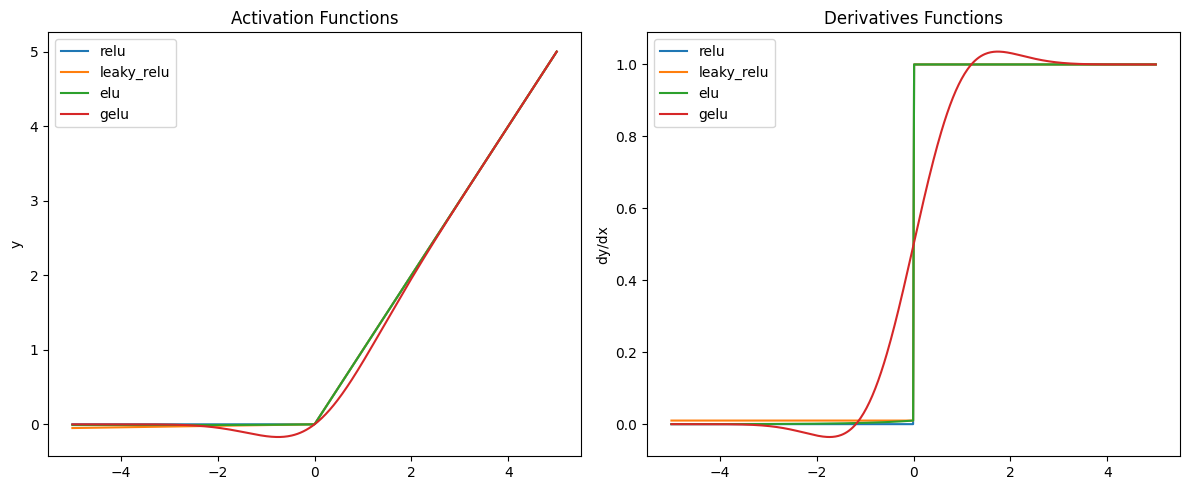

In [35]:
x = np.linspace(-5, 5, 500)

y_relu = relu.func(x)
y_leaky = leaky_relu.func(x)
y_elu = elu.func(x)
y_gelu = gelu.func(x)

y_relu_grad = relu.derivative(x)
y_leaky_grad = leaky_relu.derivative(x)
y_elu_grad = elu.derivative(x)
y_gelu_grad = gelu.derivative(x)

# 그래프 그리기
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=False)

ax[0].plot(x, y_relu, label=relu.name)
ax[0].plot(x, y_leaky, label=leaky_relu.name)
ax[0].plot(x, y_elu, label=elu.name)
ax[0].plot(x, y_gelu, label=gelu.name)
ax[0].set_title("Activation Functions")
ax[0].set_ylabel("y")
ax[0].legend()


ax[1].plot(x, y_relu_grad, label=relu.name)
ax[1].plot(x, y_leaky_grad, label=leaky_relu.name)
ax[1].plot(x, y_elu_grad, label=elu.name)
ax[1].plot(x, y_gelu_grad, label=gelu.name)
ax[1].set_title("Derivatives Functions")
ax[1].set_ylabel("dy/dx")
ax[1].legend()

fig.tight_layout()
fig.savefig("ReLU Family")
plt.show()
plt.close()
